In [13]:
import pandas as pd

In [14]:
import requests

In [15]:
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?size=10000&q=*&sort=TimeStamp:desc'


In [16]:
response = requests.get(url=url, auth=auth)

In [17]:
response

<Response [200]>

In [18]:
import json
data = json.loads(response.text)

In [19]:
data

{'took': 534,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'NUBlm38Bwa_bL2zRnJRH',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'cho2',
     'Value': 7,
     'LocationLat': 45.657148,
     'LocationLong': 25.563752,
     'TimeStamp': 1647579600000,
     'Measurement': 'µg/m3'},
    'sort': [1647579600000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'N0Blm38Bwa_bL2zRnJRk',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'o3',
     'Value': 20,
     'LocationLat': 45.657148,
     'LocationLong': 25.563752,
     'TimeStamp': 1647579600000,
     'Measurement': 'µg/m3'},
    'sort': [1647579600000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'Q0Blm38Bwa_bL2zRnJSd',
    '_score': None,
    '_source': {'Source':

In [20]:
data.keys()

dict_keys(['took', 'timed_out', '_shards', 'hits'])

In [21]:
data['hits']

{'total': {'value': 10000, 'relation': 'gte'},
 'max_score': None,
 'hits': [{'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'NUBlm38Bwa_bL2zRnJRH',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'cho2',
    'Value': 7,
    'LocationLat': 45.657148,
    'LocationLong': 25.563752,
    'TimeStamp': 1647579600000,
    'Measurement': 'µg/m3'},
   'sort': [1647579600000]},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'N0Blm38Bwa_bL2zRnJRk',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'o3',
    'Value': 20,
    'LocationLat': 45.657148,
    'LocationLong': 25.563752,
    'TimeStamp': 1647579600000,
    'Measurement': 'µg/m3'},
   'sort': [1647579600000]},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'Q0Blm38Bwa_bL2zRnJSd',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm25',
    'Value': 24,
    'LocationLat': 45.657148,
    'LocationLong': 25.563752,
    'TimeStamp': 16475796000

In [22]:
from pandas import json_normalize
df2 = json_normalize(data['hits']['hits'])

In [23]:
df2

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,NUBlm38Bwa_bL2zRnJRH,None,[1647579600000],UradMonitor,cho2,7.0,45.657148,25.563752,1647579600000,µg/m3
1,brasov-dev,_doc,N0Blm38Bwa_bL2zRnJRk,None,[1647579600000],UradMonitor,o3,20.0,45.657148,25.563752,1647579600000,µg/m3
2,brasov-dev,_doc,Q0Blm38Bwa_bL2zRnJSd,None,[1647579600000],UradMonitor,pm25,24.0,45.657148,25.563752,1647579600000,µg/m3
3,brasov-dev,_doc,RkBlm38Bwa_bL2zRnZQt,None,[1647579600000],UradMonitor,pm10,27.0,45.657148,25.563752,1647579600000,µg/m3
4,brasov-dev,_doc,UUBlm38Bwa_bL2zRnpS8,None,[1647579600000],UradMonitor,pm1,19.0,45.657148,25.563752,1647579600000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,brasov-dev,_doc,jEBwh38Bwa_bL2zR-1Ny,None,[1647241200000],Waqi,no2,38.6,45.634330,25.633872,1647241200000,µg/m3
9996,brasov-dev,_doc,jUBwh38Bwa_bL2zR-1O7,None,[1647241200000],Waqi,pm10,16.0,45.634330,25.633872,1647241200000,µg/m3
9997,brasov-dev,_doc,jkBwh38Bwa_bL2zR_FN1,None,[1647241200000],Waqi,no2,81.8,45.649117,25.604136,1647241200000,µg/m3
9998,brasov-dev,_doc,j0Bwh38Bwa_bL2zR_FN4,None,[1647241200000],Waqi,o3,5.7,45.649117,25.604136,1647241200000,µg/m3


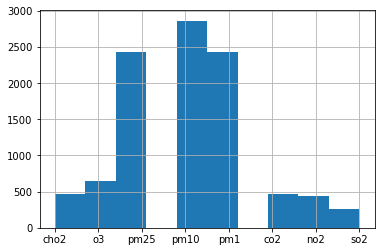

In [24]:
hist = df2.get('_source.Sensor').hist()